<a href="https://colab.research.google.com/github/Abhisekh97/Sentiment-Analysis/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import os
import opendatasets as od


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [13]:



import kaggle


kaggle.api.authenticate()
kaggle.api.dataset_download_files(dataset, path="artifacts/data_ingestion/", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews


In [12]:

# Assign the Kaggle data set URL into variable
dataset = 'snap/amazon-fine-food-reviews'
# Using opendatasets let's download the data sets
# od.download(dataset)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
plt.style.use('ggplot')
nltk.download('stopwords')
print(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer

Matplotlib is building the font cache; this may take a moment.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abhisekh.agarwala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhisekh.agarwala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
path = 'amazon-fine-food-reviews/Reviews.csv'
df = pd.read_csv(path)

In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
df = df[['Text', 'Score']]
df.shape
df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [10]:
df = df.sample(n=50000)

## Quick EDA

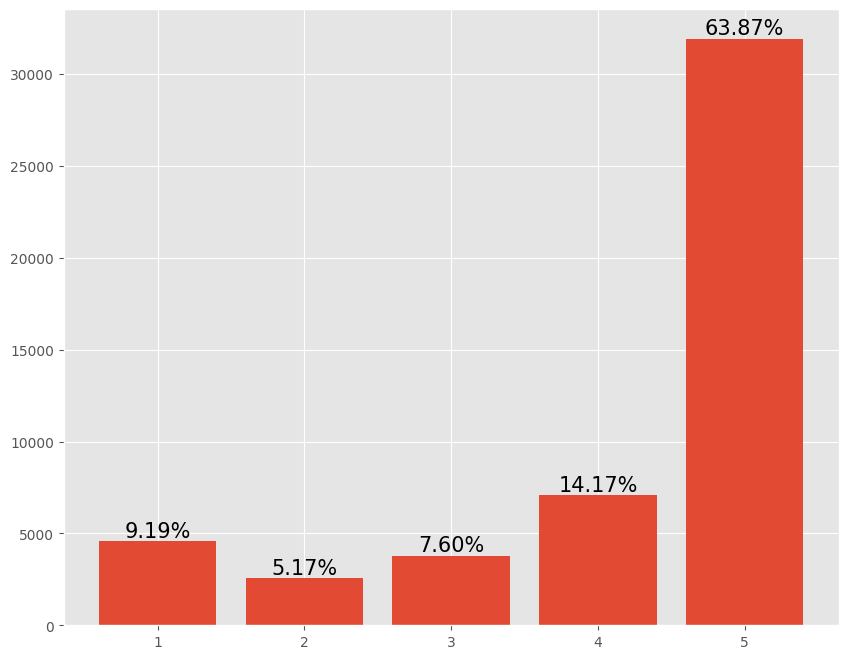

In [11]:
counts = df['Score'].value_counts().sort_index()
plt.figure(figsize=(10, 8))
p1 = plt.bar(np.arange(1,len(counts)+1), counts)

for rect1 in p1:
    height = rect1.get_height()
    value = height/counts.sum()
    plt.annotate( "{:.2f}%".format(value*100),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)

plt.show()

In [12]:
df = df.loc[df['Score']!=3]
df = df.loc[df['Score']!=4]

In [13]:
def category(score):
    return 0 if score==1 or score==2 else 1

In [14]:
df['Sentiment']= df['Score'].apply(category)

In [15]:
stop_words = stopwords.words('english')
stemmer = PorterStemmer()

In [16]:

def text_preprocessing(text):
    lower_casing = text.lower()
    tokens = word_tokenize(lower_casing)
    print(tokens)
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and token not in string.punctuation]
    return " ".join(tokens)

In [17]:
df.head()

,Text,Score,Sentiment
464389,Good tasting coffee that works with my Senseo ...,5,1
369893,"My daughter is very picky, but she like this c...",5,1
334285,Barbara's Multigrain Wheat Free Fig Bar is the...,5,1
405618,Perfect drink for beginning morning or before ...,5,1
459531,This is an excellent spice blend. I've used it...,5,1


In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2)

vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)



In [19]:
model = LogisticRegression()

model.fit(X_train_vect, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test_vect)

In [21]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
score = accuracy_score(y_test, y_pred)
score

0.918200408997955

In [23]:
confusion_metrix = confusion_matrix(y_test, y_pred)
confusion_metrix

array([[ 900,  539],
       [ 101, 6284]])

In [24]:
import pickle

with open('logistic_regression_model.pkl','wb') as f:
    pickle.dump(model,f)